In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [117]:
trip_df = pd.read_csv(r"C:\Users\shoot\OneDrive\Desktop\trip.csv")
trip_df.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0


In [118]:
trip_df[trip_df.duplicated()]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
17,Sarah Gross,08/15/2017 7:48:08 PM,08/15/2017 8:00:37 PM,Cash,1,3.6,12.5,2.85,0.0
204,Lisa Bullock,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1,4.2,21.0,0.00,0.0


In [119]:
trip_df = trip_df.drop_duplicates()
trip_df[trip_df.duplicated()]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount


In [120]:
trip_df.isnull().sum()

passenger_name           0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
payment_method           0
passenger_count          0
trip_distance            0
fare_amount              3
tip_amount               0
tolls_amount             0
dtype: int64

In [121]:
trip_df['fare_amount'] = trip_df['fare_amount'].dropna()
trip_df.isnull().sum()

passenger_name           0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
payment_method           0
passenger_count          0
trip_distance            0
fare_amount              3
tip_amount               0
tolls_amount             0
dtype: int64

In [122]:
trip_df = trip_df.dropna(subset=['fare_amount'])
trip_df.isnull().sum()

passenger_name           0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
payment_method           0
passenger_count          0
trip_distance            0
fare_amount              0
tip_amount               0
tolls_amount             0
dtype: int64

<Axes: xlabel='None', ylabel='passenger_count'>

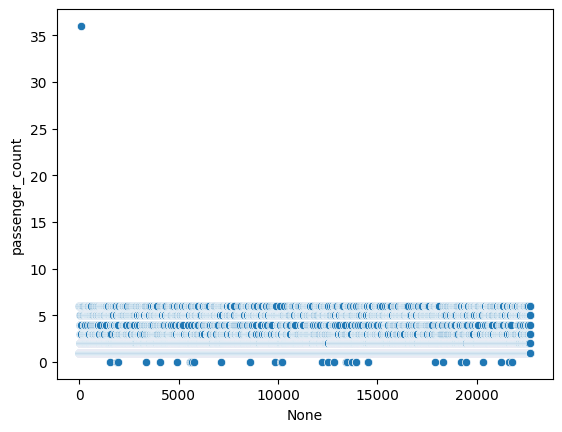

In [123]:
sns.scatterplot(x=trip_df.index, y=trip_df['passenger_count'])

In [124]:
trip_df = trip_df[trip_df['passenger_count'] <= 6] 
trip_df[trip_df['passenger_count'] > 6]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount


<Axes: xlabel='None', ylabel='passenger_count'>

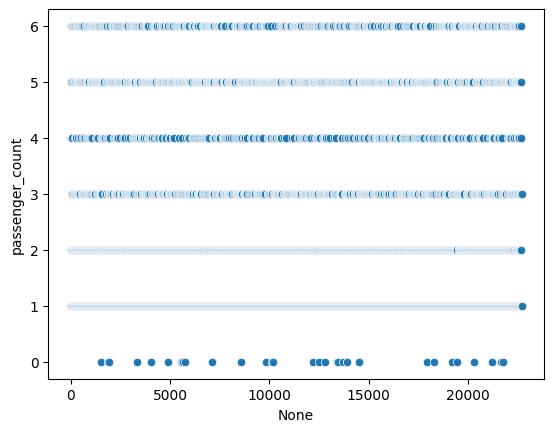

In [125]:
sns.scatterplot(x = trip_df.index, y = trip_df['passenger_count'])

In [126]:
trip_df['trip_distance'].describe()

count    22695.00000
mean         2.91235
std          3.65152
min          0.00000
25%          0.99000
50%          1.61000
75%          3.06000
max         33.96000
Name: trip_distance, dtype: float64

In [127]:
trip_df['trip_distance'].count()

np.int64(22695)

<Axes: xlabel='None', ylabel='trip_distance'>

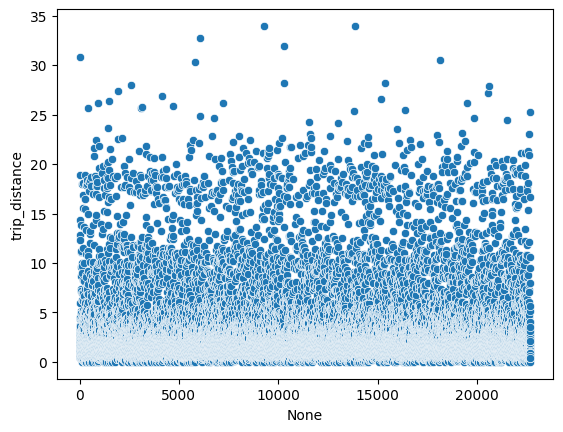

In [128]:
sns.scatterplot(x=trip_df.index, y=trip_df['trip_distance'])

<Axes: xlabel='trip_distance', ylabel='Count'>

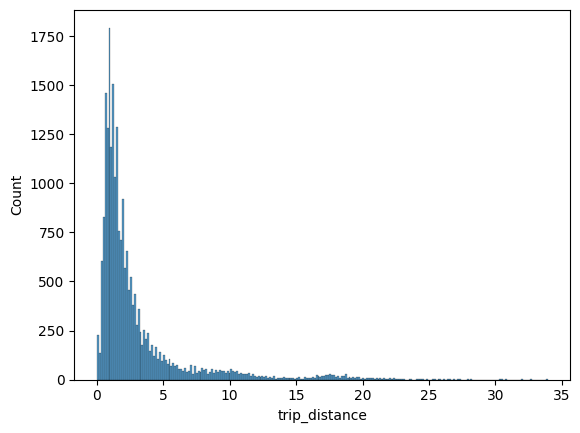

In [129]:
sns.histplot(data=trip_df, x='trip_distance')

In [130]:
trip_df[trip_df['fare_amount'] <= 0]
(trip_df['fare_amount'] <= 0).sum()

np.int64(20)

In [131]:
trip_df = trip_df[trip_df['fare_amount'] > 0]

In [132]:
(trip_df['fare_amount'] <= 0).sum()

np.int64(0)

<Axes: xlabel='None', ylabel='fare_amount'>

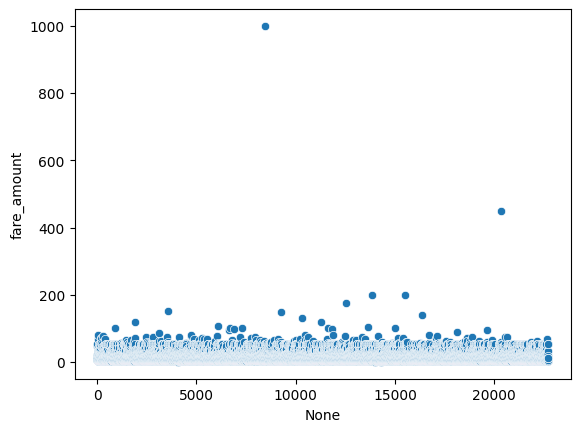

In [133]:
sns.scatterplot(x=trip_df.index, y=trip_df['fare_amount'])

In [134]:
# trip_df = trip_df['fare_amount'].apply(lambda x: 150 if x > 150 else x)

trip_df.loc[:, 'fare_amount'] = trip_df['fare_amount'].apply(lambda x: 
                                                      150 if x > 150 else x)

<Axes: xlabel='None', ylabel='fare_amount'>

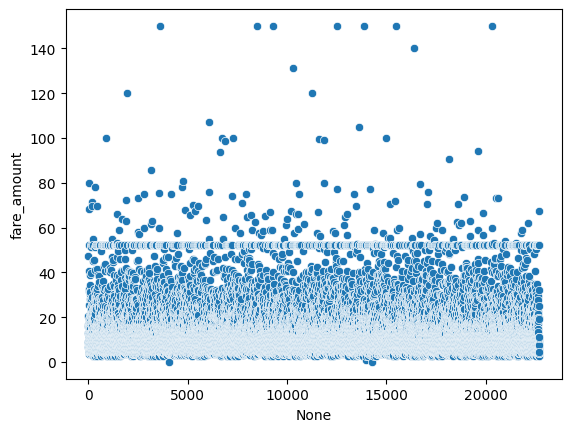

In [135]:
sns.scatterplot(x=trip_df.index, y=trip_df['fare_amount'])

<Axes: xlabel='None', ylabel='tip_amount'>

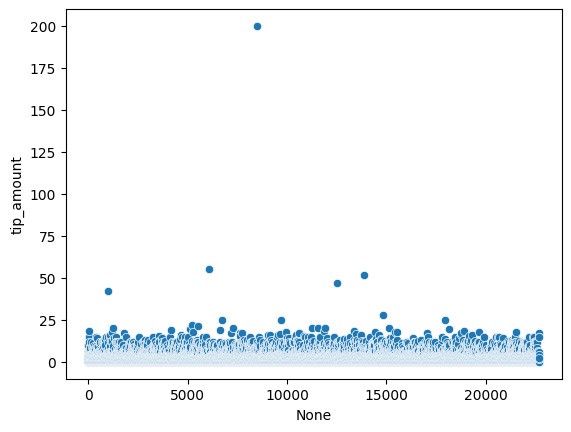

In [136]:
sns.scatterplot(x=trip_df.index, y=trip_df['tip_amount'])

In [137]:
# trip_df = trip_df['tip_amount'] <= 75, 잘못된 코드로 조건 자체만 저장한 것

trip_df = trip_df[trip_df['tip_amount'] <= 75]

<Axes: xlabel='None', ylabel='tolls_amount'>

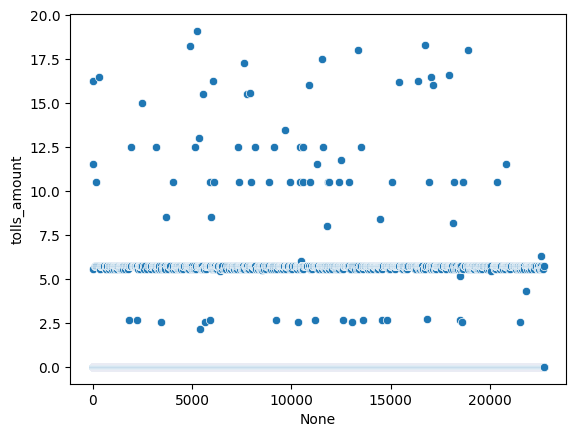

In [138]:
sns.scatterplot(x=trip_df.index, y=trip_df['tolls_amount'])

In [139]:
# trip_df['payment_method'][['Debit Card', 'Credit Card']] == trip_df['payment_method']['Card']

trip_df['payment_method'] = trip_df['payment_method'].replace({'Debit Card': 'Card', 'Credit Card': 'Card'})

In [140]:
trip_df['payment_method'].unique()

array(['Card', 'Cash'], dtype=object)

In [141]:
example = 'Susan Robinson'

In [142]:
example.split()

['Susan', 'Robinson']

In [143]:
trip_df['passenger_name'].str.split(expand=True)[0]

0          Pamela
1        Michelle
2            Tina
3         Anthony
4         Brianna
           ...   
22696      Austin
22697     Monique
22698        Drew
22699    Jonathan
22700    Benjamin
Name: 0, Length: 22674, dtype: object

In [144]:
# trip_df['passenger_first_name'] = trip_df['passenger_name'].apply().split()

trip_df['passenger_first_name'] = trip_df['passenger_name'].apply(lambda x: x.split()[0])

In [145]:
trip_df['passenger_first_name'] = trip_df['passenger_name'].str.split().str[0]

In [146]:
trip_df[['passenger_first_name']]

,passenger_first_name
0,Pamela
1,Michelle
2,Tina
3,Anthony
4,Brianna
...,...
22696,Austin
22697,Monique
22698,Drew
22699,Jonathan


In [147]:
from datetime import datetime

In [148]:
trip_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22674 entries, 0 to 22700
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22674 non-null  object 
 1   tpep_pickup_datetime   22674 non-null  object 
 2   tpep_dropoff_datetime  22674 non-null  object 
 3   payment_method         22674 non-null  object 
 4   passenger_count        22674 non-null  int64  
 5   trip_distance          22674 non-null  float64
 6   fare_amount            22674 non-null  float64
 7   tip_amount             22674 non-null  float64
 8   tolls_amount           22674 non-null  float64
 9   passenger_first_name   22674 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 1.9+ MB


In [149]:
trip_df['tpep_pickup_datetime'] = pd.to_datetime(trip_df['tpep_pickup_datetime'])

In [150]:
trip_df['tpep_dropoff_datetime'] = pd.to_datetime(trip_df['tpep_dropoff_datetime'])

In [151]:
trip_df['travel_time'] = trip_df['tpep_dropoff_datetime'] - trip_df['tpep_pickup_datetime']

In [152]:
trip_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22674 entries, 0 to 22700
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   passenger_name         22674 non-null  object         
 1   tpep_pickup_datetime   22674 non-null  datetime64[ns] 
 2   tpep_dropoff_datetime  22674 non-null  datetime64[ns] 
 3   payment_method         22674 non-null  object         
 4   passenger_count        22674 non-null  int64          
 5   trip_distance          22674 non-null  float64        
 6   fare_amount            22674 non-null  float64        
 7   tip_amount             22674 non-null  float64        
 8   tolls_amount           22674 non-null  float64        
 9   passenger_first_name   22674 non-null  object         
 10  travel_time            22674 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), float64(4), int64(1), object(3), timedelta64[ns](1)
memory usage: 2.1+ MB


In [153]:
trip_df[trip_df['travel_time'] >= pd.Timedelta('1 days')]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,passenger_first_name,travel_time


In [154]:
# trip_df = trip_df[trip_df['travel_time'].dt.seconds]
trip_df['travel_time'] = trip_df['travel_time'].dt.seconds

In [155]:
# 컬럼을 수정하고 싶을 땐, df['컬럼'] =
# 행을 골라내고 싶을 땐 df = df[...]

In [160]:
trip_df['total_amount'] = trip_df[['fare_amount', 'tip_amount', 'tolls_amount']].sum(axis=1)
trip_df['total_amount'] = trip_df['fare_amount'] + trip_df['tip_amount'] + trip_df['tolls_amount']

In [157]:
trip_df

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,passenger_first_name,travel_time,total_amount
0,Pamela Duffy,2017-03-25 08:55:43,2017-03-25 09:09:47,Card,6,3.34,13.0,2.76,0.00,Pamela,844,15.76
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Card,1,1.80,16.0,4.00,0.00,Michelle,1590,20.00
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Card,1,1.00,6.5,1.45,0.00,Tina,432,7.95
3,Anthony Ray,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,20.5,6.39,0.00,Anthony,1815,26.89
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Card,1,4.37,16.5,0.00,0.00,Brianna,1003,16.50
...,...,...,...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,2017-02-24 17:37:23,2017-02-24 17:40:39,Cash,3,0.61,4.0,0.00,0.00,Austin,196,4.00
22697,Monique Williams,2017-08-06 16:43:59,2017-08-06 17:24:47,Cash,1,16.71,52.0,14.64,5.76,Monique,2448,72.40
22698,Drew Graves,2017-09-04 14:54:14,2017-09-04 14:58:22,Card,1,0.42,4.5,0.00,0.00,Drew,248,4.50
22699,Jonathan Copeland,2017-07-15 12:56:30,2017-07-15 13:08:26,Card,1,2.36,10.5,1.70,0.00,Jonathan,716,12.20


<Axes: xlabel='trip_distance', ylabel='fare_amount'>

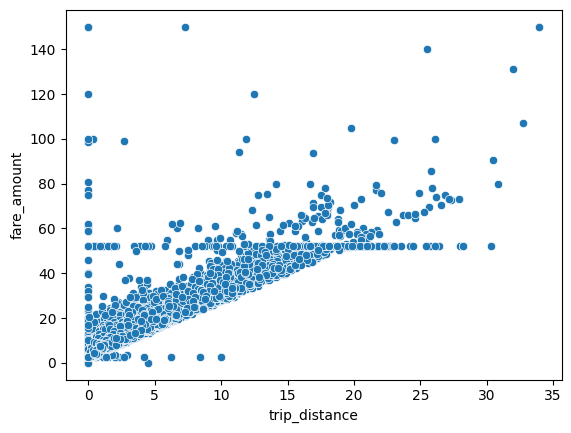

In [164]:
sns.scatterplot(data=trip_df ,x='trip_distance', y='fare_amount')

<Axes: xlabel='fare_amount', ylabel='trip_distance'>

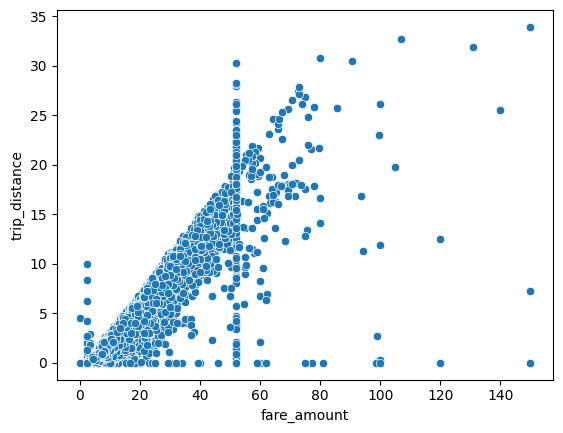

In [166]:
sns.scatterplot(x=trip_df['fare_amount'], y=trip_df['trip_distance'])

<Axes: xlabel='trip_distance', ylabel='travel_time'>

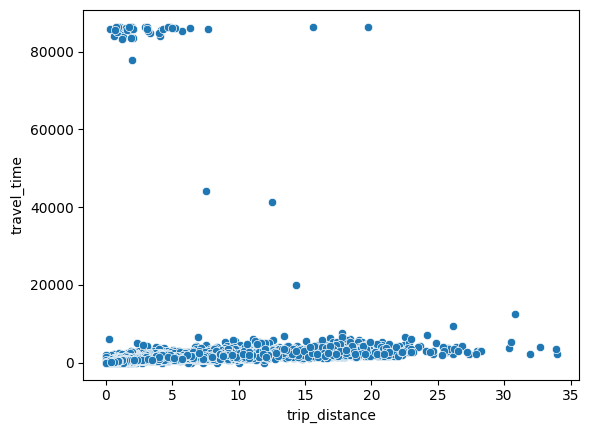

In [159]:
sns.scatterplot(data=trip_df ,x='trip_distance', y='travel_time')

In [170]:
trip_df[trip_df['travel_time'] < 60000]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,passenger_first_name,travel_time,total_amount
0,Pamela Duffy,2017-03-25 08:55:43,2017-03-25 09:09:47,Card,6,3.34,13.0,2.76,0.00,Pamela,844,15.76
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Card,1,1.80,16.0,4.00,0.00,Michelle,1590,20.00
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Card,1,1.00,6.5,1.45,0.00,Tina,432,7.95
3,Anthony Ray,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,20.5,6.39,0.00,Anthony,1815,26.89
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Card,1,4.37,16.5,0.00,0.00,Brianna,1003,16.50
...,...,...,...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,2017-02-24 17:37:23,2017-02-24 17:40:39,Cash,3,0.61,4.0,0.00,0.00,Austin,196,4.00
22697,Monique Williams,2017-08-06 16:43:59,2017-08-06 17:24:47,Cash,1,16.71,52.0,14.64,5.76,Monique,2448,72.40
22698,Drew Graves,2017-09-04 14:54:14,2017-09-04 14:58:22,Card,1,0.42,4.5,0.00,0.00,Drew,248,4.50
22699,Jonathan Copeland,2017-07-15 12:56:30,2017-07-15 13:08:26,Card,1,2.36,10.5,1.70,0.00,Jonathan,716,12.20


In [171]:
trip_df.describe()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,travel_time,total_amount
count,22674,22674,22674.000000,22674.000000,22674.000000,22674.000000,22674.000000,22674.000000,22674.000000
mean,2017-06-29 07:37:30.389477120,2017-06-29 07:54:27.931683840,1.642189,2.913558,12.979645,1.828323,0.312081,1021.352739,15.120049
min,2017-01-01 00:08:25,2017-01-01 00:17:20,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.010000
25%,2017-03-30 02:35:36.750000128,2017-03-30 02:45:08.500000,1.000000,1.000000,6.500000,0.000000,0.000000,400.000000,7.500000
50%,2017-06-23 12:51:06,2017-06-23 13:04:29,1.000000,1.610000,9.500000,1.350000,0.000000,671.000000,10.950000
75%,2017-10-02 10:43:06,2017-10-02 11:07:42.500000,2.000000,3.067500,14.500000,2.450000,0.000000,1103.000000,16.560000
max,2017-12-31 23:45:30,2017-12-31 23:49:24,6.000000,33.960000,150.000000,55.500000,19.100000,86373.000000,208.440000
std,NaN,NaN,1.284929,3.650458,11.052491,2.472544,1.397138,3723.159046,13.613449


In [172]:
trip_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22674 entries, 0 to 22700
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   passenger_name         22674 non-null  object        
 1   tpep_pickup_datetime   22674 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  22674 non-null  datetime64[ns]
 3   payment_method         22674 non-null  object        
 4   passenger_count        22674 non-null  int64         
 5   trip_distance          22674 non-null  float64       
 6   fare_amount            22674 non-null  float64       
 7   tip_amount             22674 non-null  float64       
 8   tolls_amount           22674 non-null  float64       
 9   passenger_first_name   22674 non-null  object        
 10  travel_time            22674 non-null  int32         
 11  total_amount           22674 non-null  float64       
dtypes: datetime64[ns](2), float64(5), int32(1), int64(1), object(3)
m